# Validation of effective Hamiltonian extraction

In [1]:
import os
import logging
import numpy as np
import matplotlib.pyplot as plt
import h5py
import rqutils.paulis as paulis
from rqutils.qprint import qprint
from rqutils.math import matrix_exp, matrix_angle
import qudit_sim

qudit_sim.config.jax_devices = [0, 1]

try:
    os.makedirs('heff_validation')
except OSError:
    pass

## Single qubit resonant drive

In [2]:
hgen = qudit_sim.HamiltonianBuilder(2)
hgen.add_qudit(qubit_frequency=100., anharmonicity=-8., drive_amplitude=6., qudit_id='q0')

In [3]:
hgen.add_drive('q0', frequency=100., amplitude=0.1)
qudit_sim.analysis.print_hamiltonian(hgen.build(rwa=True))

<IPython.core.display.Latex object>

In [4]:
components = qudit_sim.apps.find_heff(hgen, 'q0', frequency=100., amplitude=0.1, cycles=100., save_result_to='heff_validation/single_qubit_resonant', log_level=logging.INFO)

INFO:qudit_sim.pulse_sim:Using 3201 time points from 0.000e+00 to 1.257e+01
INFO:qudit_sim.pulse_sim:Hamiltonian with 2 terms built. Starting simulation..
INFO:qudit_sim.pulse_sim:Done in 0.702757 seconds.
INFO:qudit_sim.pulse_sim:Saving the simulation result to heff_validation/single_qubit_resonant_sim.qu
INFO:qudit_sim.apps.find_heff:Starting maximization loop..
INFO:qudit_sim.apps.find_heff:Done after 107 steps.


In [5]:
qudit_sim.analysis.print_components(components)

<IPython.core.display.Latex object>

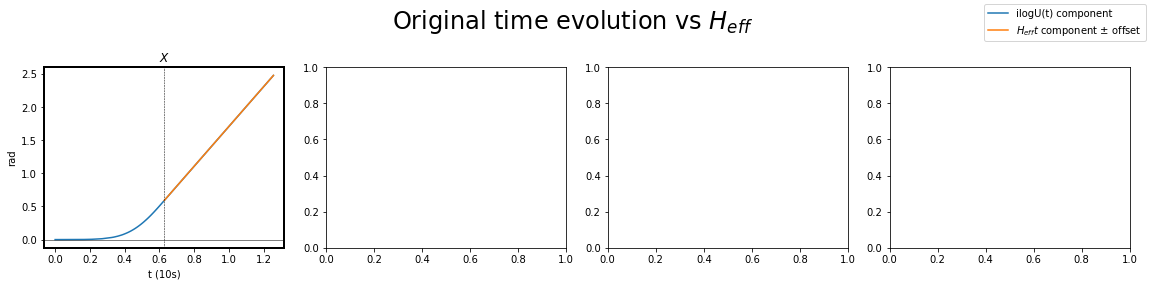

<Figure size 432x288 with 0 Axes>

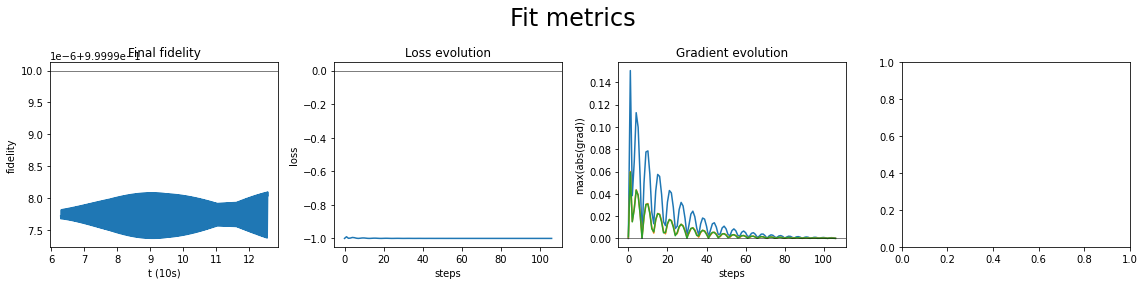

In [6]:
qudit_sim.analysis.inspect_heff_fit('heff_validation/single_qubit_resonant_heff.h5');

## Single qubit off-resonant drive

When the drive is slightly off-resonant, it becomes hard to define an effective Hamiltonian, but there is some linear dependency that can be extracted.

In [7]:
hgen = qudit_sim.HamiltonianBuilder(2)
qubit_freq = 100.
drive_freq = 100.1
drive_amp = 0.1
hgen.add_qudit(qubit_frequency=qubit_freq, anharmonicity=-8., drive_amplitude=6., qudit_id='q0')
components = qudit_sim.apps.find_heff(hgen, qudit='q0', frequency=drive_freq, amplitude=drive_amp, save_result_to='heff_validation/single_qubit_offresonant', log_level=logging.INFO)

INFO:qudit_sim.pulse_sim:Using 17592 time points from 0.000e+00 to 6.905e+01
INFO:qudit_sim.pulse_sim:Hamiltonian with 2 terms built. Starting simulation..
INFO:qudit_sim.pulse_sim:Done in 3.499621 seconds.
INFO:qudit_sim.pulse_sim:Saving the simulation result to heff_validation/single_qubit_offresonant_sim.qu
INFO:qudit_sim.apps.find_heff:Starting maximization loop..
INFO:qudit_sim.apps.find_heff:Done after 220 steps.


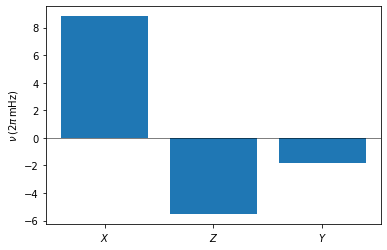

In [8]:
qudit_sim.analysis.plot_components(components, threshold=0.001);

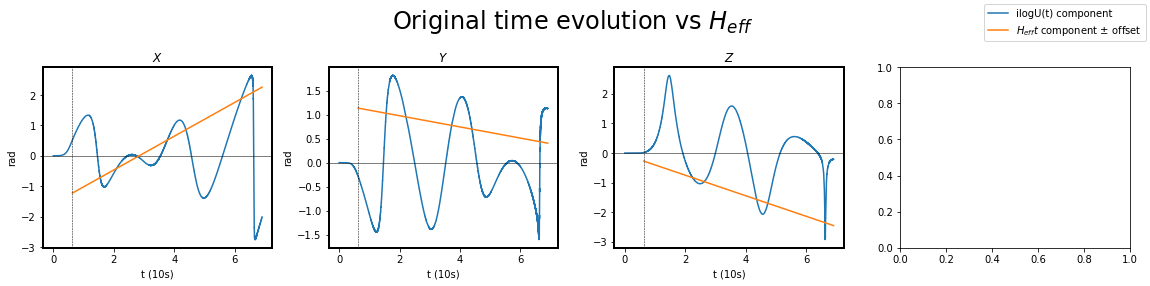

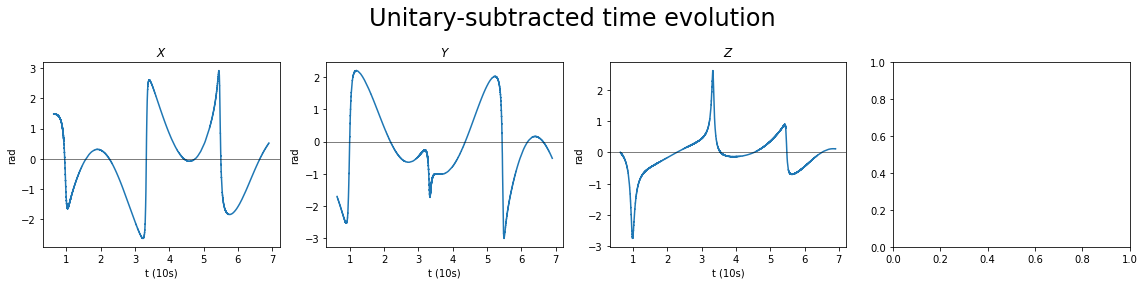

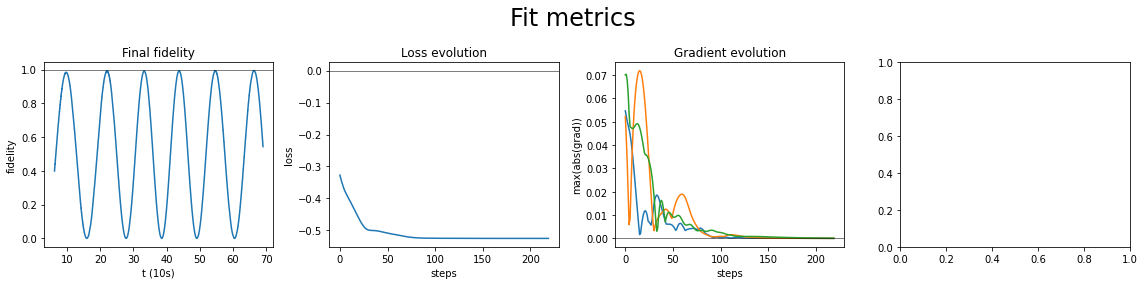

In [9]:
qudit_sim.analysis.inspect_heff_fit('heff_validation/single_qubit_offresonant_heff.h5');

## Single qutrit qubit-resonant drive, qubit $H_{\mathrm{eff}}$ extraction

In [10]:
hgen = qudit_sim.HamiltonianBuilder(3)
hgen.add_qudit(qubit_frequency=100., anharmonicity=-8., drive_amplitude=6., qudit_id='q0')

In [11]:
hgen.add_drive('q0', frequency=100., amplitude=0.1)
qudit_sim.analysis.print_hamiltonian(hgen.build(rwa=True))

<IPython.core.display.Latex object>

In [12]:
components = qudit_sim.apps.find_heff(hgen, qudit='q0', frequency=100., amplitude=0.1, save_result_to='heff_validation/single_qutrit_resonant', log_level=logging.INFO)

INFO:qudit_sim.pulse_sim:Using 17601 time points from 0.000e+00 to 6.912e+01
INFO:qudit_sim.pulse_sim:Hamiltonian with 3 terms built. Starting simulation..
INFO:qudit_sim.pulse_sim:Done in 3.473559 seconds.
INFO:qudit_sim.pulse_sim:Saving the simulation result to heff_validation/single_qutrit_resonant_sim.qu
INFO:qudit_sim.apps.find_heff:Starting maximization loop..
INFO:qudit_sim.apps.find_heff:Done after 133 steps.


In [13]:
qudit_sim.analysis.print_components(components, threshold=0.)

<IPython.core.display.Latex object>

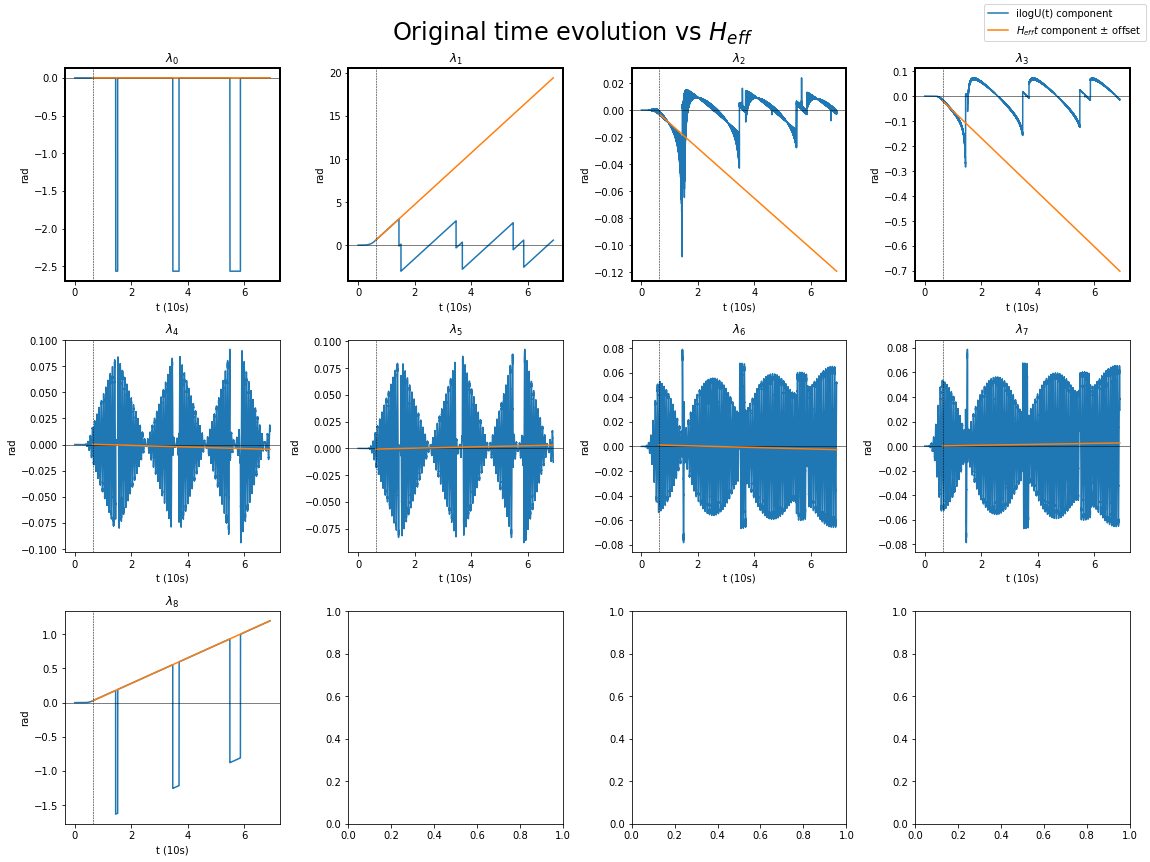

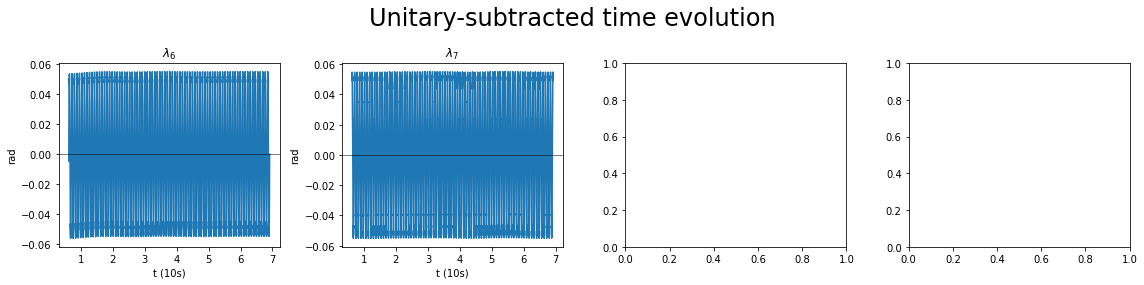

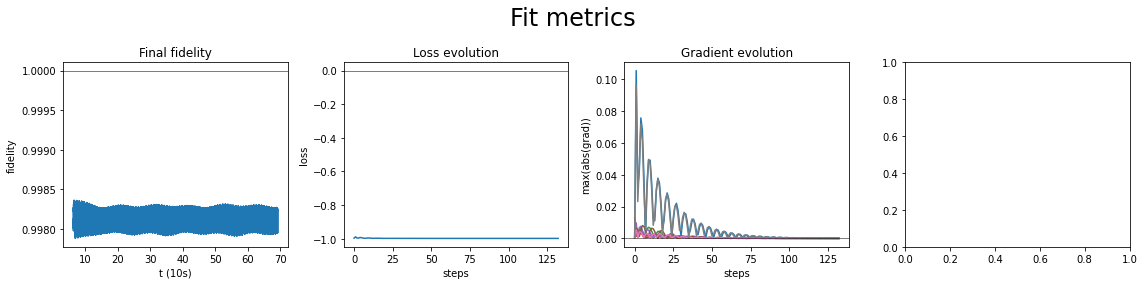

In [14]:
qudit_sim.analysis.inspect_heff_fit('heff_validation/single_qutrit_resonant_heff.h5');

## Two qubit cross resonance, no crosstalk

In [15]:
hgen = qudit_sim.HamiltonianBuilder(2)
hgen.add_qudit(qubit_frequency=100000., anharmonicity=-8000., drive_amplitude=6000., qudit_id='q0')
hgen.add_qudit(qubit_frequency=110000., anharmonicity=-7000., drive_amplitude=7000., qudit_id='q1')
hgen.add_coupling('q0', 'q1', 30.)
drive_frequency = hgen.dressed_frequencies('q1')[0]

In [16]:
hgen.add_drive('q0', frequency=drive_frequency, amplitude=0.2)
qudit_sim.analysis.print_hamiltonian(hgen.build(rwa=True))

<IPython.core.display.Latex object>

In [17]:
components = qudit_sim.apps.find_heff(hgen, qudit='q0', frequency=drive_frequency, amplitude=0.2, save_result_to='heff_validation/cross_resonance', log_level=logging.INFO)

INFO:qudit_sim.pulse_sim:Using 16801 time points from 0.000e+00 to 6.283e-02
INFO:qudit_sim.pulse_sim:Hamiltonian with 2 terms built. Starting simulation..
INFO:qudit_sim.pulse_sim:Done in 3.290043 seconds.
INFO:qudit_sim.pulse_sim:Saving the simulation result to heff_validation/cross_resonance_sim.qu
INFO:qudit_sim.apps.find_heff:Starting maximization loop..
INFO:qudit_sim.apps.find_heff:Done after 114 steps.


In [18]:
qudit_sim.analysis.print_components(components)

<IPython.core.display.Latex object>

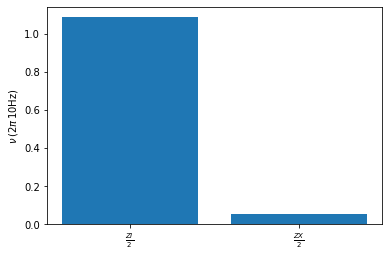

In [19]:
qudit_sim.analysis.plot_components(components);

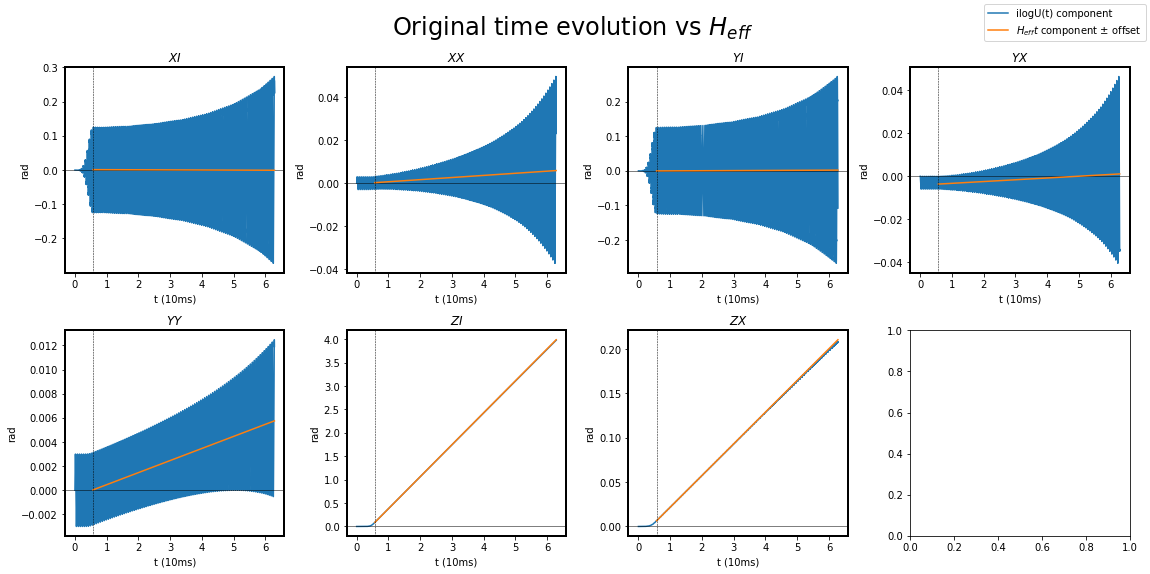

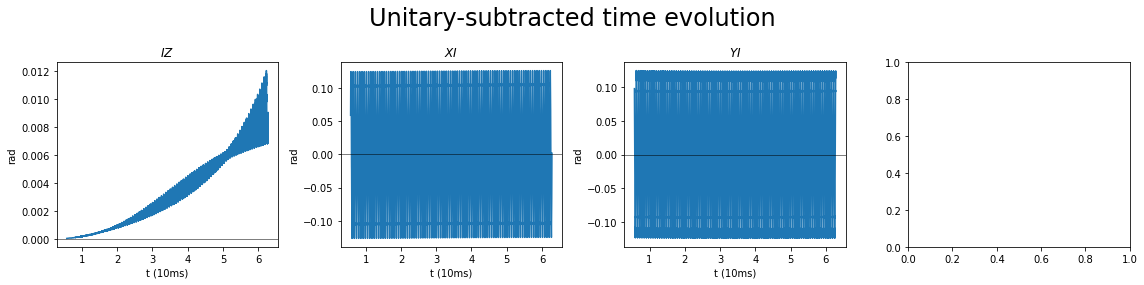

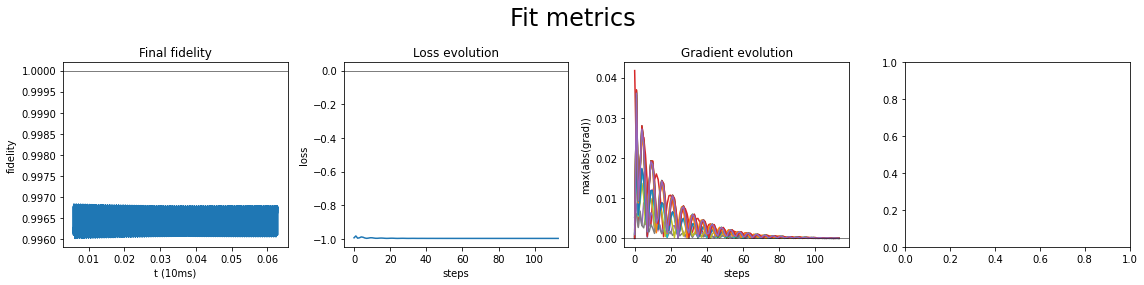

In [20]:
qudit_sim.analysis.inspect_heff_fit('heff_validation/cross_resonance_heff.h5');

## Cross resonance amplitude scan

In [21]:
amplitudes = np.linspace(-0.3, 0.3, 20)

hgen = qudit_sim.HamiltonianBuilder(2)
hgen.add_qudit(qubit_frequency=100000., anharmonicity=-8000., drive_amplitude=6000., qudit_id='q0')
hgen.add_qudit(qubit_frequency=110000., anharmonicity=-7000., drive_amplitude=7000., qudit_id='q1')
hgen.add_coupling('q0', 'q1', 30.)
drive_frequency = hgen.dressed_frequencies('q1')[0]

components_list = qudit_sim.apps.find_heff(hgen, qudit='q0', frequency=drive_frequency, amplitude=amplitudes, save_result_to='heff_validation/cr_amplitude_scan', log_level=logging.INFO)

INFO:qudit_sim.parallel:Starting 20 parallel execution of pulse_sim
INFO:qudit_sim.pulse_sim:Using 16801 time points from 0.000e+00 to 6.283e-02
INFO:qudit_sim.pulse_sim:Using 16801 time points from 0.000e+00 to 6.283e-02
INFO:qudit_sim.pulse_sim:Hamiltonian with 2 terms built. Starting simulation..
INFO:qudit_sim.pulse_sim:Using 16801 time points from 0.000e+00 to 6.283e-02
INFO:qudit_sim.pulse_sim:Hamiltonian with 2 terms built. Starting simulation..
INFO:qudit_sim.pulse_sim:Using 16801 time points from 0.000e+00 to 6.283e-02
INFO:qudit_sim.pulse_sim:Hamiltonian with 2 terms built. Starting simulation..
INFO:qudit_sim.pulse_sim:Using 16801 time points from 0.000e+00 to 6.283e-02
INFO:qudit_sim.pulse_sim:Hamiltonian with 2 terms built. Starting simulation..
INFO:qudit_sim.pulse_sim:Using 16801 time points from 0.000e+00 to 6.283e-02
INFO:qudit_sim.pulse_sim:Hamiltonian with 2 terms built. Starting simulation..
INFO:qudit_sim.pulse_sim:Using 16801 time points from 0.000e+00 to 6.283e-0

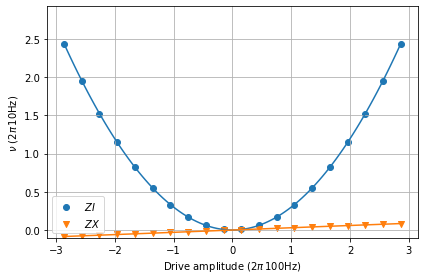

In [22]:
physical_amplitudes = amplitudes * hgen.qudit_params('q0').drive_amplitude
fig, coefficients, amp_scale, compo_scale = qudit_sim.analysis.plot_amplitude_scan(physical_amplitudes, components_list)

In [23]:
qudit_sim.analysis.print_amplitude_scan(coefficients, amp_scale, compo_scale)

<IPython.core.display.Latex object>

## Two qutrit no drive

Statically coupled qudits feature "always-on" diagonal effective Hamiltonian because of the dressing of energy levels.
Here we use a two-qutrit system with an unrealistically large coupling to illustrate this point.

In [24]:
hgen = qudit_sim.HamiltonianBuilder(3)
hgen.add_qudit(qubit_frequency=100000., anharmonicity=-8000., drive_amplitude=6000., qudit_id='q0')
hgen.add_qudit(qubit_frequency=110000., anharmonicity=-7000., drive_amplitude=7000., qudit_id='q1')
hgen.add_coupling('q0', 'q1', 3000.)

In [25]:
# Pass a null tuple to qudit, frequency, and amplitude to run a no-drive Heff analysis
components = qudit_sim.apps.find_heff(hgen, qudit=tuple(), frequency=tuple(), amplitude=tuple(), cycles=10, save_result_to='heff_validation/two_qutrit_hstat', log_level=logging.INFO)

INFO:qudit_sim.pulse_sim:Using 81 time points from 0.000e+00 to 3.309e-03
INFO:qudit_sim.pulse_sim:Hamiltonian with 1 terms built. Starting simulation..
INFO:qudit_sim.pulse_sim:Done in 0.085278 seconds.
INFO:qudit_sim.pulse_sim:Saving the simulation result to heff_validation/two_qutrit_hstat_sim.qu
INFO:qudit_sim.apps.find_heff:Starting maximization loop..
INFO:qudit_sim.apps.find_heff:Done after 179 steps.


In [26]:
qudit_sim.analysis.print_components(components)

<IPython.core.display.Latex object>

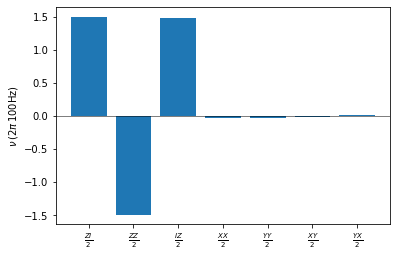

In [27]:
qudit_sim.analysis.plot_components(components);

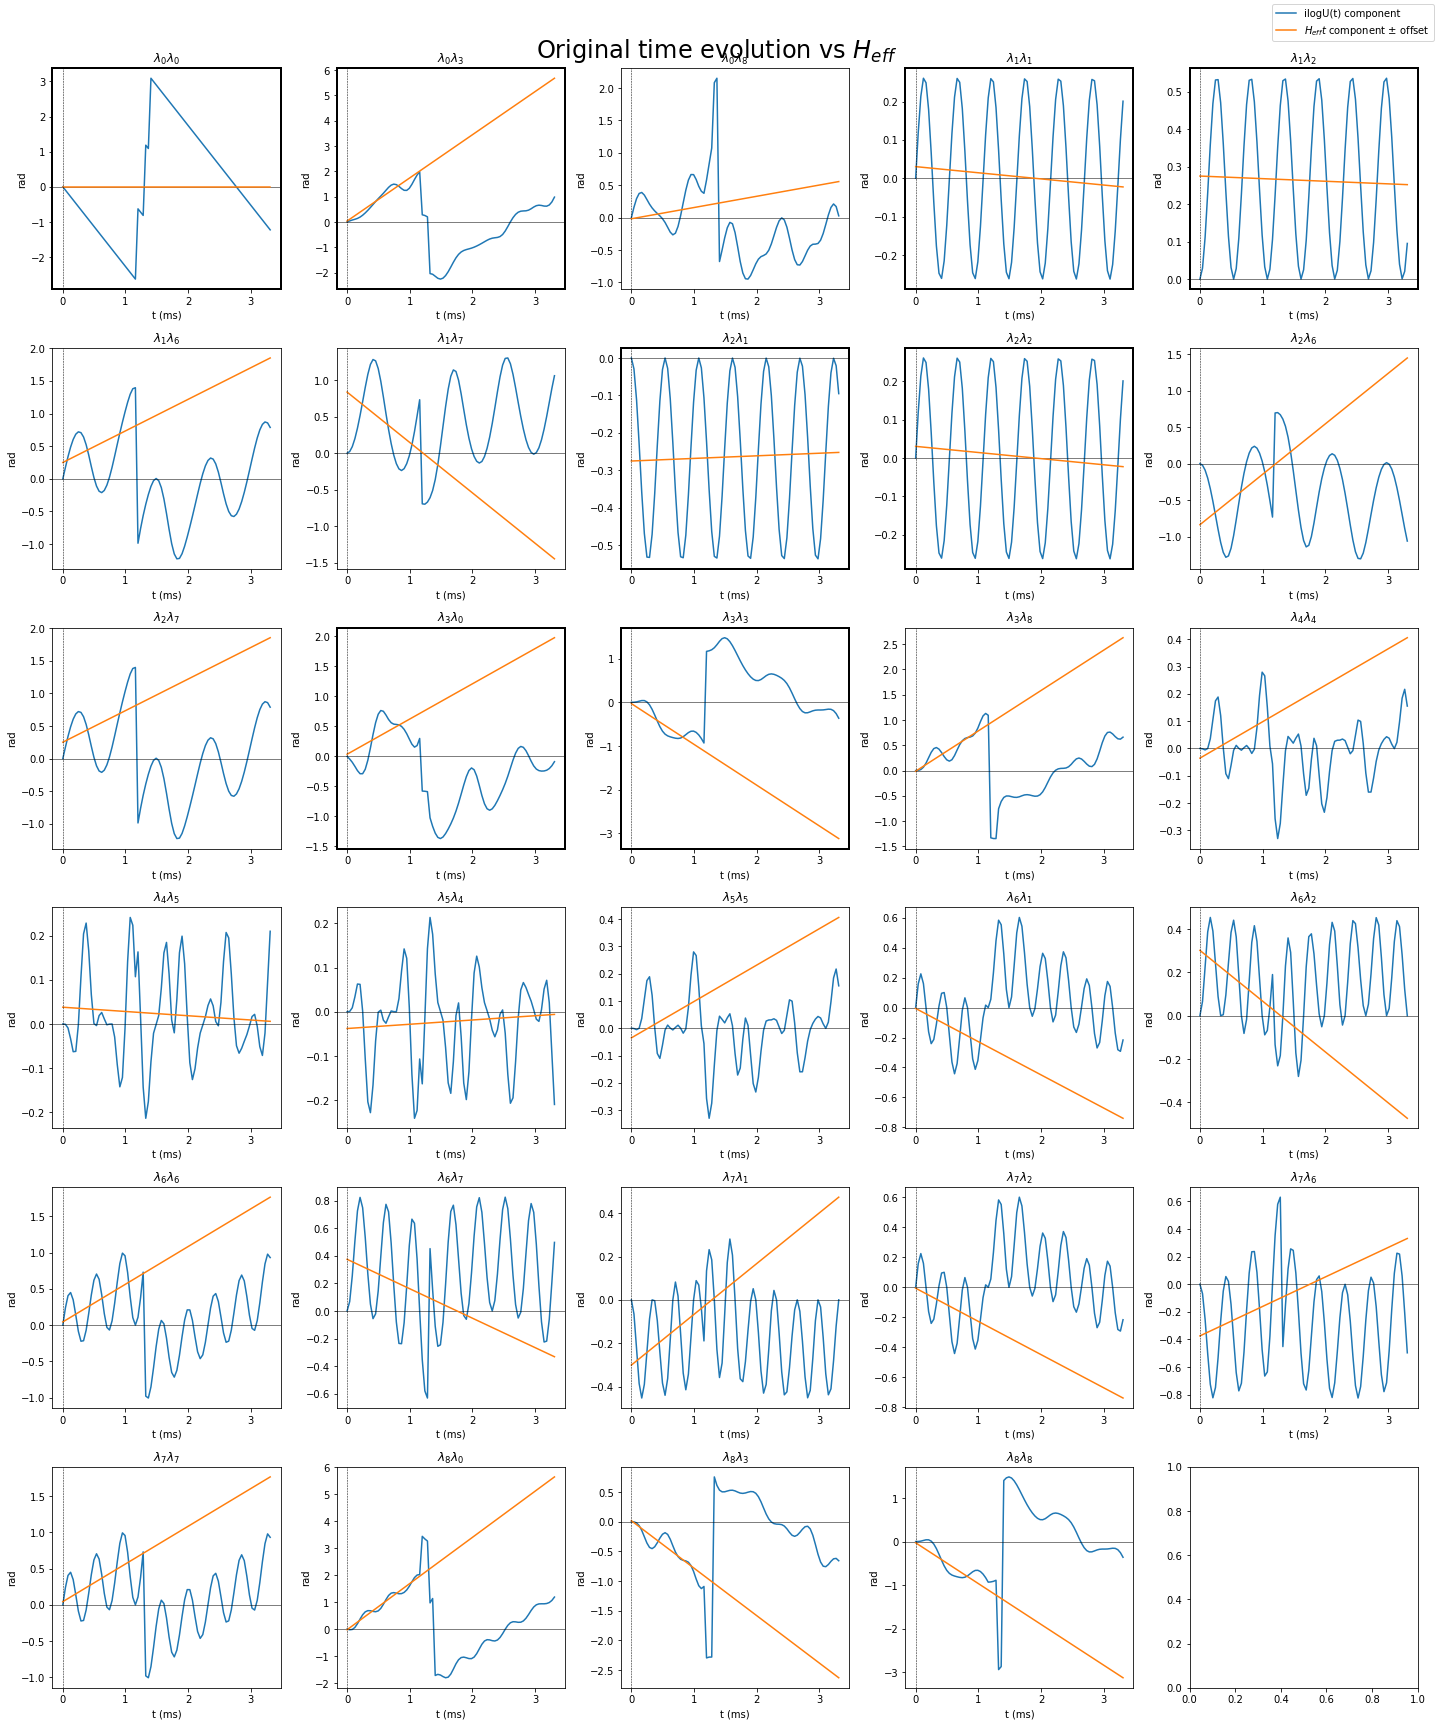

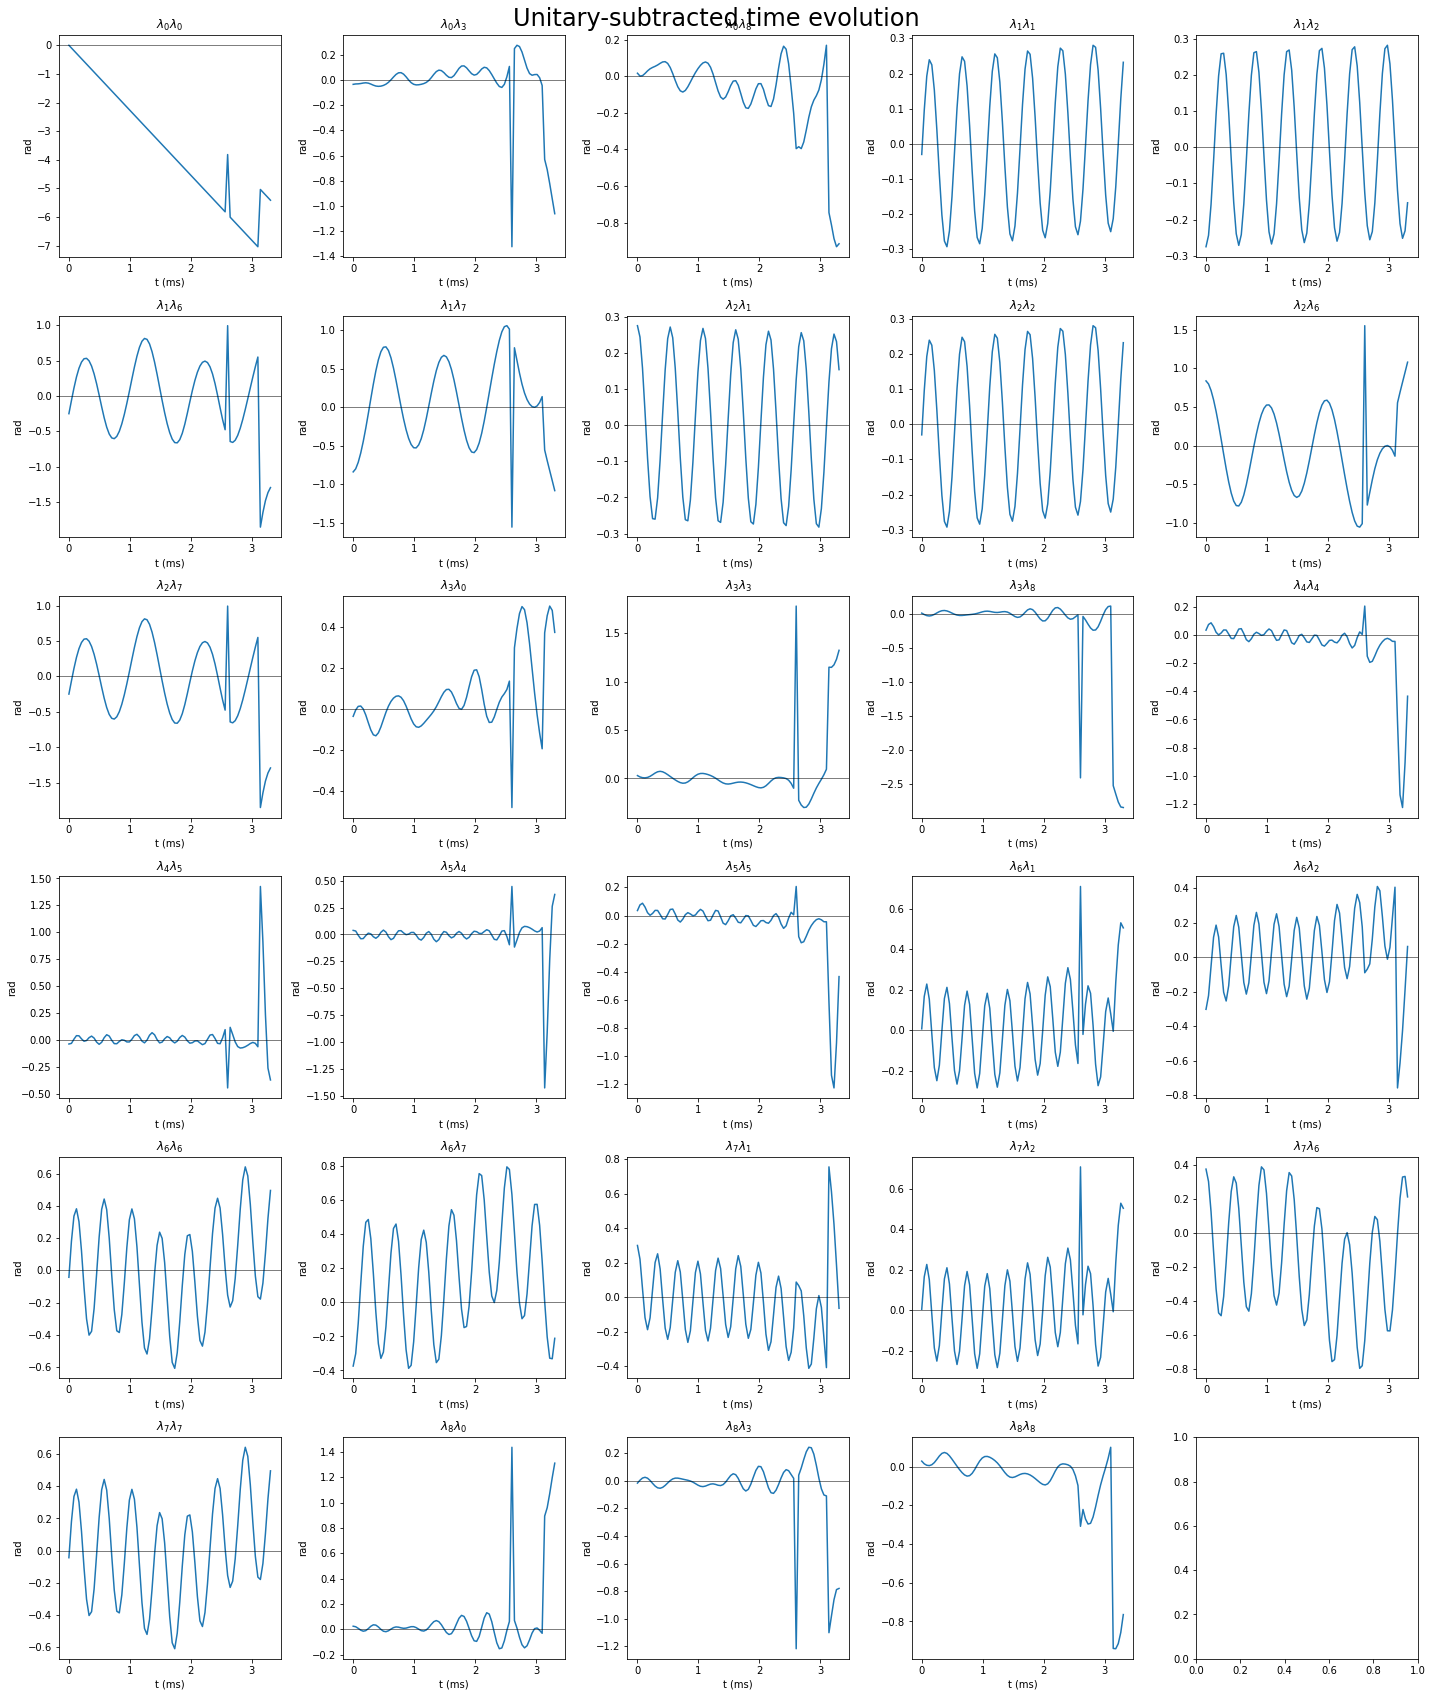

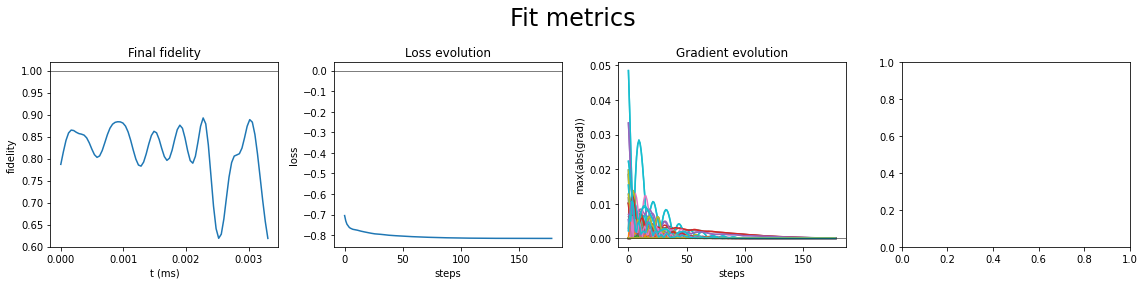

In [28]:
qudit_sim.analysis.inspect_heff_fit('heff_validation/two_qutrit_hstat_heff.h5');